In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('supershops.csv') 

In [3]:
df.head() 

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

In [5]:
x =  df.drop('Profit', axis=1)

In [6]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [7]:
y = df['Profit'] 

In [8]:
df.isnull().sum() 

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [10]:
#df.isnull()

In [13]:
df[18:21]

,Marketing Spend,Administration,Transport,Area,Profit
18,91749.16,114175.79,294919.57,Rangpur,124266.90
19,86419.70,153514.11,NaN,Dhaka,122776.86
20,76253.86,113867.30,298664.47,Ctg,118474.03


# Measure of Central Tendency

In [14]:
df.Transport.mean() #no outliers

215331.73244897963

In [15]:
df.Transport.median() #outliers exist

214634.81

<AxesSubplot:xlabel='Transport', ylabel='Count'>

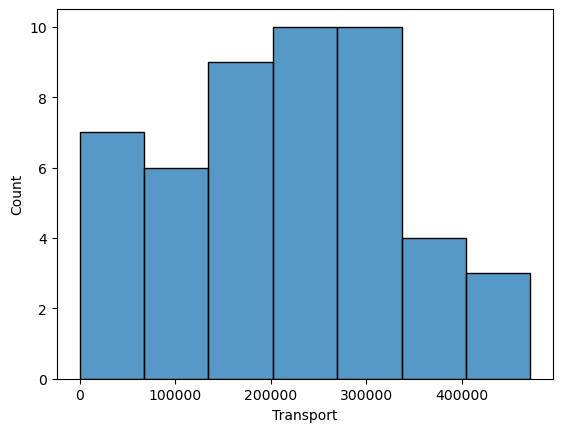

In [16]:
import seaborn as sns
sns.histplot(df.Transport)

In [19]:
mean = df.Transport.mean()
df.Transport = df.Transport.fillna(mean)
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [20]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [21]:
mean

215331.73244897963

In [22]:
df[18:21]

,Marketing Spend,Administration,Transport,Area,Profit
18,91749.16,114175.79,294919.570000,Rangpur,124266.90
19,86419.70,153514.11,215331.732449,Dhaka,122776.86
20,76253.86,113867.30,298664.470000,Ctg,118474.03


# Label Encoder

In [23]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
#fit transform: https://youtu.be/0T3MpmbAHXg
df1.Area = le.fit_transform(df[['Area']])

In [27]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [28]:
le.classes_

array(['Ctg', 'Dhaka', 'Rangpur'], dtype=object)

In [29]:
le.transform(le.classes_)

array([0, 1, 2])

# Decode the encoded values back to original classes

In [30]:
#df.Area = decoded_classes = le.inverse_transform(df1.Area)
decoded_classes = le.inverse_transform(df1.Area)
decoded_classes

array(['Dhaka', 'Ctg', 'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg', 'Rangpur', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Dhaka', 'Rangpur', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Dhaka',
       'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg'],
      dtype=object)

In [31]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [32]:
#After decoding
df1.Area = decoded_classes
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# Label Encoding with Label mapping

In [33]:
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [34]:
label_mapping = {'Dhaka': 1, 'Rangpur': 2, 'Ctg': 0}

In [35]:
label_mapping

{'Dhaka': 1, 'Rangpur': 2, 'Ctg': 0}

In [36]:
label_mapping.keys()

dict_keys(['Dhaka', 'Rangpur', 'Ctg'])

In [37]:
label_mapping.values()

dict_values([1, 2, 0])

In [38]:
df2.Area = [label_mapping[area] for area in df2.Area] #List comprehension

In [39]:
df2.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [40]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# replace method

In [41]:
df3['Area'] = df3['Area'].replace(label_mapping) 

In [42]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# One Hot Encoder

In [65]:
df4 = pd.read_csv('supershops.csv')
df4.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [66]:
pd.get_dummies(df4['Area']).head()

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [67]:
dummy = pd.get_dummies(df4['Area'], drop_first=True, prefix='Area', prefix_sep='_' )

In [63]:
df4.drop('Area', axis=1, inplace=True)

In [68]:
df4.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [69]:
dummy.head()

,Area_Dhaka,Area_Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [71]:
#new_df4 = pd.concat([df4, pd.get_dummies(df4['Area'], drop_first=True, prefix='Area', prefix_sep='_' )], axis=1)
new_df4 = pd.concat([df4, dummy], axis=1)

In [72]:
new_df4.head()

,Marketing Spend,Administration,Transport,Area,Profit,Area_Dhaka,Area_Rangpur
0,114523.61,136897.80,471784.10,Dhaka,192261.83,1,0
1,162597.70,151377.59,443898.53,Ctg,191792.06,0,0
2,153441.51,101145.55,407934.54,Rangpur,191050.39,0,1
3,144372.41,118671.85,383199.62,Dhaka,182901.99,1,0
4,142107.34,91391.77,366168.42,Rangpur,166187.94,0,1


# Ordinal Encoder

In [76]:
df5.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [77]:
df5.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
ordinal = OrdinalEncoder(categories = [['Dhaka', 'Ctg', 'Rangpur']])

In [80]:
df5.Area = ordinal.fit_transform(df5[['Area']])

In [81]:
df5.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,0.0,192261.83
1,162597.70,151377.59,443898.53,1.0,191792.06
2,153441.51,101145.55,407934.54,2.0,191050.39
3,144372.41,118671.85,383199.62,0.0,182901.99
4,142107.34,91391.77,366168.42,2.0,166187.94
